# Cost functions

# Measuring "Badness": Cost Functions and Gradient Descent

We know a neural network has thousands of parameters (weights and biases). But how does it "learn" the correct values for them? This notebook explores the two core concepts behind the learning process: **Cost Functions** and **Gradient Descent**.

First, let's remember that a brand new network is just a collection of random numbers.
<mark>And to start things off, we're just going to initialize all of those weights and biases totally randomly.</mark>

As you'd expect, its initial performance is terrible. Let's see this in action.

Loading MNIST Data...

✅ Data loaded successfully!
Training images shape: (60000, 28, 28)


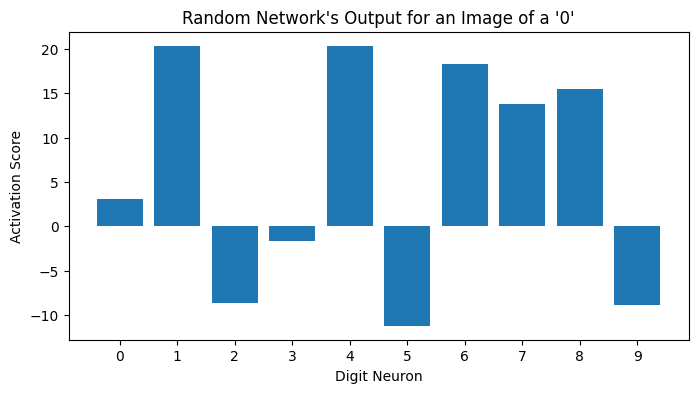

As the text says, the output layer just looks like a mess.


In [2]:
import numpy as np
from matplotlib import pyplot as plt

from utils import get_mnist_corrected


# --- Example of how to use it ---
print("Loading MNIST Data...")
x_train, y_train, x_test, y_test = get_mnist_corrected()

print("\n✅ Data loaded successfully!")
print(f"Training images shape: {x_train.shape}")

# --- Simulate a random network's output ---
# Get a sample image of a '3'
sample_image = x_train[1]
sample_label = y_train[1]

# Initialize a random final layer (10 neurons) for demonstration
random_weights = np.random.randn(784, 10)
random_biases = np.random.randn(1, 10)

# Flatten the image and make a prediction
input_vector = sample_image.reshape(1, 784)
output_activations = input_vector @ random_weights + random_biases

# --- Visualize the "messy" output ---
plt.figure(figsize=(8, 4))
plt.bar(range(10), output_activations.flatten())
plt.xticks(range(10))
plt.title(f"Random Network's Output for an Image of a '{sample_label}'")
plt.xlabel("Digit Neuron")
plt.ylabel("Activation Score")
plt.show()

print("As the text says, the output layer just looks like a mess.")

## 2. Defining a Cost Function

To improve, the network needs feedback. We need a way to quantify exactly how bad its random output is. This is the job of the **cost function**.

<mark>So what you do is define a cost function, a way of telling the computer, "no, bad computer, that output should have activations which are 0 for most neurons, but 1 for this neuron..."</mark>

A common method is to calculate the **sum of the squares of the differences** between the network's output and the desired output. This is also known as Mean Squared Error (MSE).

For a single training example, the cost $C$ is:

$$C(W, b) = \sum_{i=0}^{9} (a_i - y_i)^2$$

Here, $a_i$ is the activation of the i-th output neuron, and $y_i$ is the *desired* activation (1 for the correct digit, 0 for all others). The total cost for the network is the **average cost over all training examples**.

In [3]:
def calculate_mse_cost(prediction, target):
    """Calculates the Mean Squared Error cost."""
    return np.sum((prediction - target)**2)

# The desired output for a '3'
# This is a "one-hot" vector where the 3rd index is 1.0
desired_output = np.zeros(10)
desired_output[sample_label] = 1.0

# Calculate the cost for our random network's terrible prediction
cost = calculate_mse_cost(output_activations.flatten(), desired_output)
print(f"Cost of the random prediction: {cost:.4f} (This is high!)")

# Let's see what the cost would be for a "good" prediction
good_prediction = np.array([0.0, 0.0, 0.1, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
good_cost = calculate_mse_cost(good_prediction, desired_output)
print(f"Cost of a good prediction: {good_cost:.4f} (This is much lower!)")

Cost of the random prediction: 1881.1434 (This is high!)
Cost of a good prediction: 1.8200 (This is much lower!)


## 3. Minimizing the Cost: Rolling Down the Hill

The cost isn't just a number; it's a complex function that depends on all 13,000+ weights and biases. Our goal is to find the combination of parameters that results in the lowest possible cost.

<mark>How do you find an input that minimizes the value of this function?... The image you might have in mind here is a ball rolling down a hill.</mark>

We can't solve this problem directly. Instead, we use an iterative approach called **Gradient Descent**. We start at a random point on the "hill" (our random weights) and take small steps in the "downhill" direction until we reach a valley, or a **local minimum**.

The ball settled in a local minimum near x = -1.58


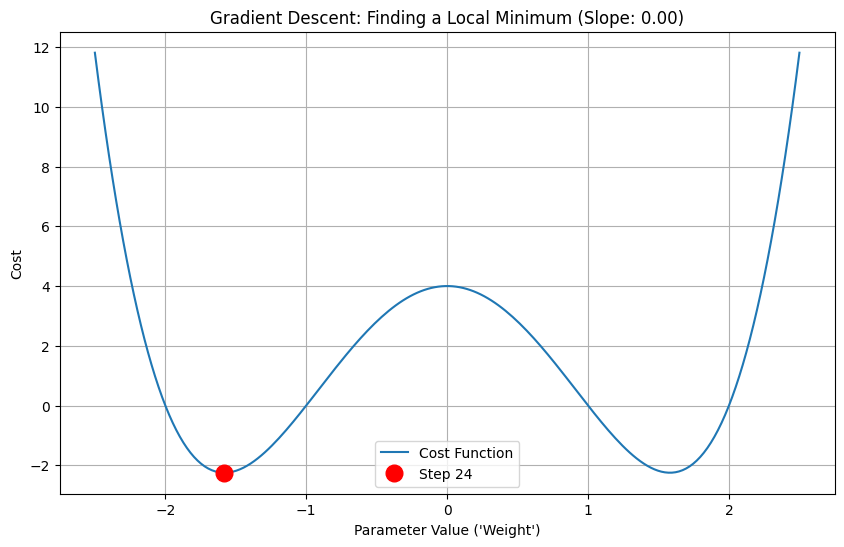

In [7]:
from matplotlib import pyplot as plt

import time
from IPython.display import display, clear_output

# Define a more complex "cost landscape" with a local minimum
def cost_landscape(x):
    return x**4 - 5*x**2 + 4

def derivative_landscape(x):
    # The derivative (slope) tells us which way is "uphill"
    return 4*x**3 - 10*x

# --- Animate the ball rolling down the hill ---
x_vals = np.linspace(-2.5, 2.5, 200)
y_vals = cost_landscape(x_vals)
current_x = -0.5  # Our random starting point
learning_rate = 0.05
iterations = 25

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(iterations):
    ax.clear()
    ax.plot(x_vals, y_vals, label='Cost Function')
    ax.plot(current_x, cost_landscape(current_x), 'ro', markersize=12, label=f'Step {i}')
    
    # Calculate the slope (gradient)
    slope = derivative_landscape(current_x)
    
    # Take a step downhill (opposite the slope)
    # The step size is proportional to the slope!
    step_size = learning_rate * slope
    current_x = current_x - step_size
    
    ax.set_title(f"Gradient Descent: Finding a Local Minimum (Slope: {slope:.2f})")
    ax.set_xlabel("Parameter Value ('Weight')")
    ax.set_ylabel("Cost")
    ax.grid(True)
    ax.legend()
    
    display(fig)
    clear_output(wait=True)
    time.sleep(0.1)

print(f"The ball settled in a local minimum near x = {current_x:.2f}")

In [8]:
# Make sure you have these imports at the top of your notebook (or in relevant cells)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # For 3D plotting
from IPython.display import display, clear_output
import time

## 4. Gradient Descent in Higher Dimensions (3D Example)

While our neural network has thousands of parameters, it's easier to visualize how Gradient Descent works in a slightly more complex, but still comprehensible, scenario. Let's imagine a cost function that depends on **two parameters** instead of just one.

This creates a 3D "cost landscape" with hills and valleys. Our goal remains the same: find the combination of the two parameters that minimizes the cost.

The principle of Gradient Descent extends directly: at each step, we calculate the slope in *both* parameter directions (the **gradient vector**) and move a small amount in the opposite direction.

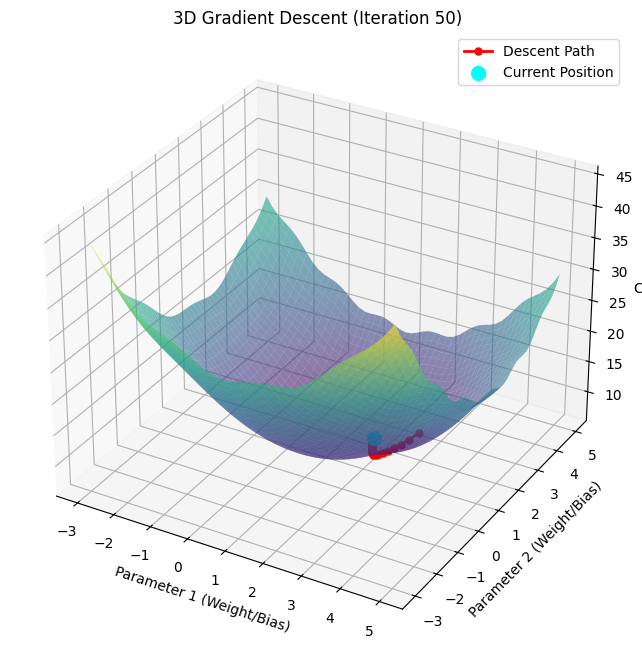


✅ Gradient Descent completed in 3D!
Final parameters: (x=1.53, y=2.34)
Final cost: 5.18


In [9]:
# Define a 3D cost function (e.g., a simple paraboloid with some noise)
def cost_function_3d(x, y):
    return (x - 1)**2 + (y - 2)**2 + np.sin(x*y)*0.5 + 5

# Define the partial derivatives (gradients) for x and y
# In a real neural network, these would be calculated using backpropagation
def gradient_x(x, y):
    return 2 * (x - 1) + np.cos(x*y)*0.5*y

def gradient_y(x, y):
    return 2 * (y - 2) + np.cos(x*y)*0.5*x

# --- Setup the 3D Plot ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for the surface plot
x_mesh = np.linspace(-3, 5, 50)
y_mesh = np.linspace(-3, 5, 50)
X, Y = np.meshgrid(x_mesh, y_mesh)
Z = cost_function_3d(X, Y)

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

# --- Gradient Descent Parameters ---
current_x, current_y = 4.0, 0.0  # Initial random starting point
current_z = cost_function_3d(current_x, current_y)
learning_rate = 0.05
iterations = 50

# Store the path for plotting
path_x = [current_x]
path_y = [current_y]
path_z = [current_z]

# --- Animation Loop ---
for i in range(iterations):
    clear_output(wait=True) # Clear previous frame

    # Calculate gradients
    grad_x = gradient_x(current_x, current_y)
    grad_y = gradient_y(current_x, current_y)
    
    # Update parameters
    current_x -= learning_rate * grad_x
    current_y -= learning_rate * grad_y
    current_z = cost_function_3d(current_x, current_y)
    
    # Store path
    path_x.append(current_x)
    path_y.append(current_y)
    path_z.append(current_z)

    # Plot the surface again
    ax.clear()
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
    
    # Plot the path of the descent
    ax.plot(path_x, path_y, path_z, color='red', marker='o', markersize=5, linestyle='-', linewidth=2, label='Descent Path')
    ax.scatter(current_x, current_y, current_z, color='cyan', s=100, label='Current Position')
    
    ax.set_title(f"3D Gradient Descent (Iteration {i+1})")
    ax.set_xlabel("Parameter 1 (Weight/Bias)")
    ax.set_ylabel("Parameter 2 (Weight/Bias)")
    ax.set_zlabel("Cost")
    ax.set_zlim(np.min(Z), np.max(Z)) # Keep z-axis consistent
    ax.legend()
    
    display(fig)
    time.sleep(0.1)

print(f"\n✅ Gradient Descent completed in 3D!")
print(f"Final parameters: (x={current_x:.2f}, y={current_y:.2f})")
print(f"Final cost: {current_z:.2f}")

plt.close(fig) # Close the last displayed figure